# UPA - projekt 01: Školství v ČR - 2. časť
## Vizualizácia dát

### Importovanie potrebných knižníc

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Dotazy skupiny A - 1

- 4 krabicové grafy, které zobrazí rozložení mateřských škol podle jejich kapacity v Brně / Praze / Jihomoravském / Středočeském kraji.
- [ms_distribution.csv](./output/csv/ms_distribution.csv)

<Figure size 800x800 with 0 Axes>

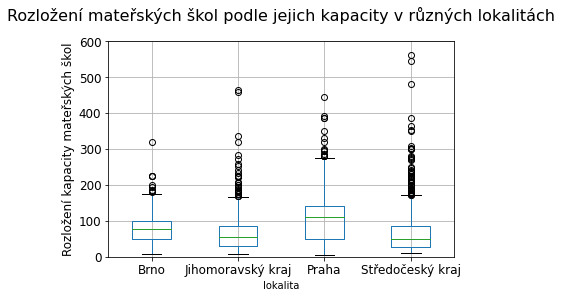

In [11]:
# load stored data from csv file to python pandas dataframe
df = pd.read_csv ('./output/csv/ms_distribution.csv')

fig = plt.figure(figsize=(10, 10), dpi=80)
fig.set_size_inches(10, 10)

boxplot = df.boxplot(by='lokalita', column='kapacita', fontsize=12)

plt.title('Rozložení mateřských škol podle jejich kapacity v různých lokalitách', fontsize=16, pad=20)
plt.suptitle('') # that's what you're after

plt.ylim(0, max(df['kapacita'])+40)
plt.ylabel("Rozložení kapacity mateřských škol", fontsize=12)

plt.savefig("output/svg/box_plot.svg", format="svg", bbox_inches='tight')

# Dotazy skupiny A - 2
- histogram znázorňující distribuci počtu základních škol podle jejich kapacity v celé ČR a ve zvoleném kraji.
- [Počty základních škol podle jejich kapacity v celé ČR](./output/csv/zs_all_rep.csv)
- [Počty základních škol podle jejich kapacity v Olomouckém kraji](./output/csv/zs_olomouc_region.csv)

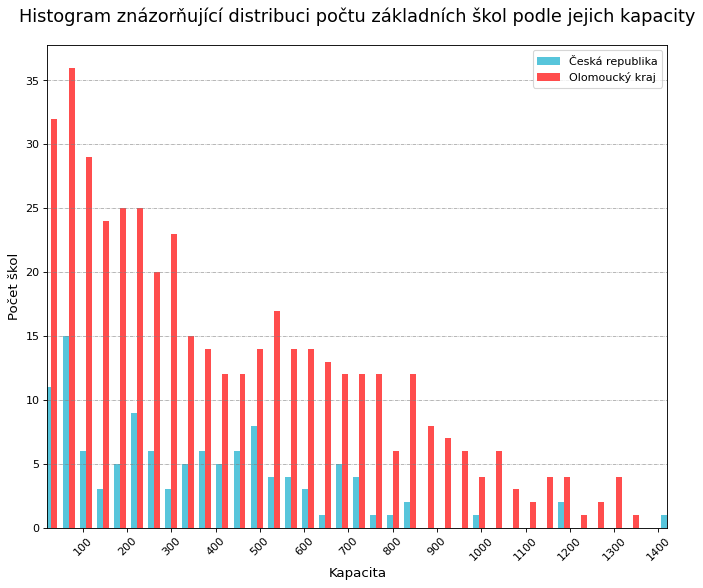

In [12]:
# load stored data from csv file to python pandas dataframe
df_CR = pd.read_csv ('./output/csv/zs_all_rep.csv')
df_kraj = pd.read_csv ('./output/csv/zs_olomouc_region.csv')

fig = plt.figure(figsize=(10, 6), dpi=80)
fig.set_size_inches(10, 8)

ax = plt.subplot(111)

plt.title('Histogram znázorňující distribuci počtu základních škol podle jejich kapacity', fontsize=16, pad=20)

ax = plt.hist([df_CR["kapacita"], df_kraj["kapacita"]], color=['#57c5db','#ff4d4d'], histtype ='bar', label=['Česká republika', 'Olomoucký kraj'], bins=50, rwidth=0.7)
plt.legend(prop={'size': 10})

plt.xlim(min(df_CR['kapacita']), max(df_CR['kapacita']))
plt.xticks(rotation = 45)
plt.locator_params(axis="x", nbins=20)
plt.locator_params(axis="y", nbins=15)

plt.ylabel("Počet škol", fontsize=12)
plt.xlabel("Kapacita", fontsize=12)
plt.grid(axis = 'y', color = 'grey', linestyle = '-.', linewidth = 0.5)

plt.savefig("output/svg/hist.svg", format="svg", bbox_inches='tight')

# Dotaz skupiny B
- Žebříček krajů dle kapacity škol na počet obyvatel, výsledky zobrazte graficky. Graf bude pro každý kraj zobrazovat kapacitu všech škol, celkový počet obyvatel a kapacitu škol na jednoho obyvatele. Graf můžete zhotovit kombinací dvou grafů do jednoho (jeden sloupcový graf zobrazí první dvě hodnoty a druhý, čárový graf, hodnotu třetí).

- [Kraje České republiky, jejich celková populace a kapacita škol](./output/csv/population_capacity_regions.csv)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
/var/folders/5l/62bq39z520df0qcsrt_q541w0000gp/T/ipykernel_59773/3977498262.py:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_xticks()])


<Figure size 800x480 with 0 Axes>

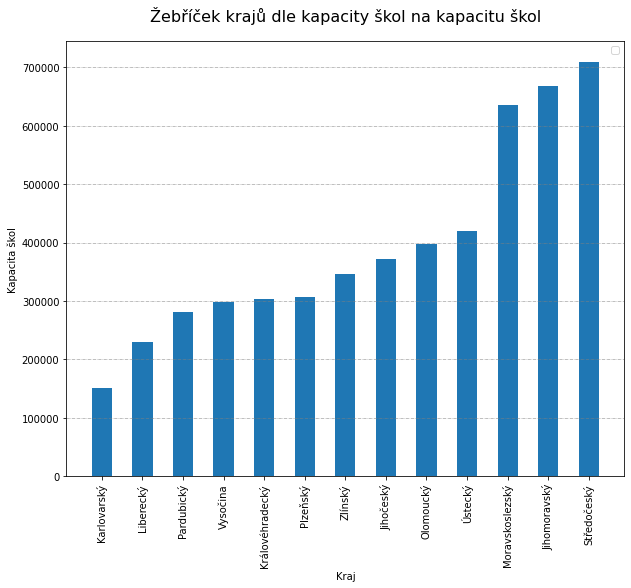

<Figure size 1600x1600 with 0 Axes>

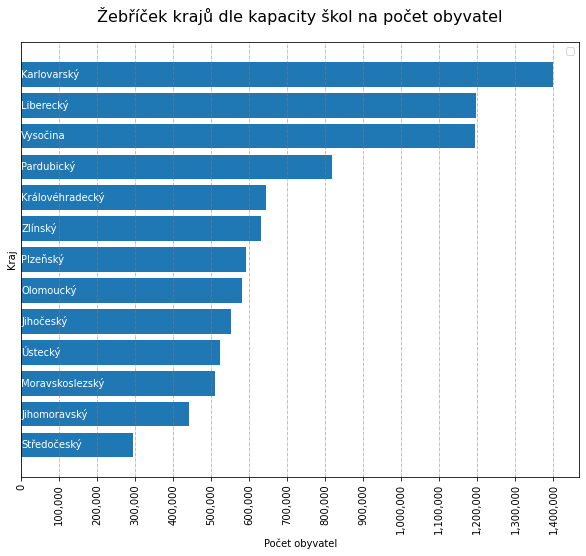

In [13]:
# load stored data from csv file to python pandas dataframe
df = pd.read_csv ('./output/csv/population_capacity_regions.csv')

region_names_dict = dict()
region_names_dict['stredocesky'] ='Středočeský' 
region_names_dict['jihomoravsky'] = 'Jihomoravský'
region_names_dict['moravskoslezsky'] = 'Moravskoslezský'
region_names_dict['ustecky'] = 'Ústecký'
region_names_dict['olomoucky'] = 'Olomoucký'
region_names_dict['jihocesky'] = 'Jihočeský'
region_names_dict['zlinsky'] = 'Zlínský'
region_names_dict['plzensky'] = 'Plzeňský'
region_names_dict['karlovarsky'] = 'Karlovarský'
region_names_dict['kralovehradecky'] = 'Královéhradecký'
region_names_dict['vysocina'] = 'Vysočina'
region_names_dict['liberecky'] = 'Liberecký'
region_names_dict['pardubicky'] = 'Pardubický'

sorted_regions_labels = []
for ordered_kraj in df["Kraj"]:
    sorted_regions_labels.append(region_names_dict[ordered_kraj])

fig = plt.figure(figsize=(10, 6), dpi=80)
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)

plt.title('Žebříček krajů dle kapacity škol na kapacitu škol', fontsize=16, pad=20)
plt.grid(axis = 'y', color = 'grey', linestyle = '-.', linewidth = 0.5)

ax = plt.bar(df["Kraj"],df["Kapacita"], width=0.5)
plt.legend(prop={'size': 10})
plt.xticks(df["Kraj"], sorted_regions_labels, rotation = 90)
 
plt.xlabel("Kraj")
plt.ylabel("Kapacita škol")

plt.savefig("output/svg/bar_region_school_cap.svg", format="svg", bbox_inches='tight')

df = df.sort_values(["Populace"], ascending=True).reset_index(drop=True)
sorted_regions_labels = []
for ordered_kraj in df["Kraj"]:
    sorted_regions_labels.append(region_names_dict[ordered_kraj])

fig = plt.figure(figsize=(20, 20), dpi=80)
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)

plt.title('Žebříček krajů dle kapacity škol na počet obyvatel', fontsize=16, pad=20)
bar_h = ax.barh(df["Kraj"], df["Populace"])

plt.legend(prop={'size': 10})
plt.yticks([])

plt.grid(axis = 'x', color = 'grey', linestyle = '-.', linewidth = 0.5)

for bar, region in zip(bar_h.patches, sorted_regions_labels[::-1]):
    ax.text(0.5, bar.get_y()+bar.get_height()/2, region, color = 'white', ha = 'left', va = 'center') 

plt.locator_params(axis="x", nbins=20)

plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_xticks()])

plt.xlabel("Počet obyvatel")
plt.ylabel("Kraj")

plt.xticks(rotation = 90)

plt.savefig("output/svg/bar_hor_region_population.svg", format="svg", bbox_inches='tight')

# Vlastný dotaz - 1

Vybraný kraj (juhomoravský) - kapacita základních škol a počet detí vo veku 5 - 15 rokov 

- [Kapacita základních škol a počet detí vo veku 5 - 15 rokov](./output/csv/population_5-15_capacity_jihomoravsky.csv)

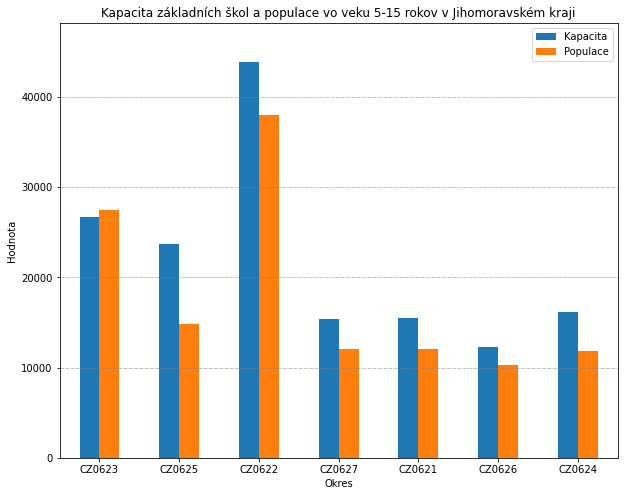

In [14]:
# load stored data from csv file to python pandas dataframe
df = pd.read_csv ('./output/csv/population_5-15_capacity_jihomoravsky.csv')
df = df.set_index("Okres")

ax = df.plot(kind='bar', rot=0, xlabel='Okres', ylabel='Hodnota', title='Kapacita základních škol a populace vo veku 5-15 rokov v Jihomoravském kraji', figsize=(10, 8))

ax.margins(y=0.1)
plt.grid(axis = 'y', color = 'grey', linestyle = '-.', linewidth = 0.5)

plt.legend(prop={'size': 10})
plt.savefig("output/svg/bar_region_school_cap_population.svg", format="svg", bbox_inches='tight')

# Vlastný dotaz - 2

Vybraný kraj (jihomoravský) - počet mužů a žen

- [počet mužů a žen v Jihomoravském kraji](./output/csv/population_gender.csv)

<Figure size 800x480 with 0 Axes>

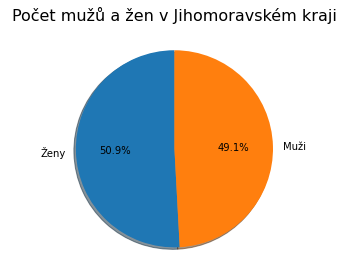

In [15]:
# load stored data from csv file to python pandas dataframe
df = pd.read_csv ('./output/csv/population_gender.csv')

labels = 'Ženy', 'Muži'
sizes = df['počet']

fig, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.title('Počet mužů a žen v Jihomoravském kraji', fontsize=16, pad=20)


plt.savefig("output/svg/population_gender.svg", format="svg", bbox_inches='tight')